# 1.1 Writing down sets of linear equations

In this section, we're going to write down some linear equations using vector and matrix notation. Once we're comfortable with this we'll move onto solving equations.

Linear models are quite useful because they're simple to build and will be simple to solve. Let's look at what one is, in this context. Here's an example of a linear model:

$\mathbf y = m \mathbf x + c$

Here the model $\mathbf y$ (sometimes called the dependent variable) is given by a vector $\mathbf x$ (sometimes called a regressor) some multiplicative factor (sometimes called a weight $m$ and an offset $c$. 

Let's make a model where any "y" value $y_i$ is given by 2 times the "x" value $x+i$ plus 3.

$\mathbf y = 2 \mathbf x + 3$

<div class="admonition">
<p class="admonition-title">A note about noise</p>
    <p>The true model above is better given as </p>
    <p>$\mathbf y = m \mathbf x + c + \mathbf{\epsilon}$</p>
    <p>where $\mathbf{\epsilon}$ is a noise term.  For now, we're going to drop this term, and in all this work we're going to assume that the noise is a Normal (Gaussian) noise distribution. We'll come back to this, don't worry.</p>
</div>

### What do you mean a "linear" model?

Above I told you $\mathbf y = m \mathbf x + c$ was a linear model, let's talk about what I mean by that, in this context.

To fit my data, I want to build some **system of linear equations**, which are made up of regressors and shared **variables**. Here's a set of linear equations that have the same variables stored in the two elemenet vector $\mathbf w$


$y_0 = w_0 \cdot x_0 + w_1$

$y_1 = w_0 \cdot x_1 + w_1$

$y_2 = w_0 \cdot x_2 + w_1$

This is linear because all these equations share the same variable $\mathbf w$. The below equation is not linear

$\mathbf y = w_0 \cdot w_1 \cdot \mathbf{x} + w_2$

because here's not a single solution for $w_0$ and $w_1$. 

## Matrix Notation

Matrix notation is going to become helpful for us in this workbook. Let's express the above set of linear equations as a matrix multiplication. 

$ \mathbf y = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \end{bmatrix} \cdot \mathbf w$

where

$\mathbf w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$


We could also write the first equation ($\mathbf y = 2 \mathbf x + 3$) as a matrix multiplication

$\mathbf y = \mathbf A \cdot \mathbf w$

Where 

$ \mathbf w = \begin{bmatrix} 2 & 3 \end{bmatrix}$

and

$ \mathbf A = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ .. & .. \\ x_n & 1 \end{bmatrix}$


$ \mathbf y = \mathbf A \cdot \mathbf w = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ .. & ..\\ x_n & 1 \end{bmatrix} \cdot \begin{bmatrix} 2 \\ 3 \end{bmatrix}$


Putting in some values for x we find:

$ \begin{bmatrix} 3 & 5 & 7 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\ 2 & 1 \end{bmatrix} \cdot \begin{bmatrix} 2 \\ 3 \end{bmatrix}$

Let's implement this in `numpy`.

In [9]:
import numpy as np
# Vector of x
x = np.arange(3)
# Matrix consisting of x, and a column of ones
A = np.vstack([x, x**0]).T
w = np.asarray([2, 3])
y = A.dot(w)


print('A:\n', A)
print('w:\n',  w)
print('y:\n', y)

A:
 [[0 1]
 [1 1]
 [2 1]]
w:
 [2 3]
y:
 [3 5 7]


## Bigger Linear Models
So long as we can write our model as something that is a set of column vector regressors with a shared set of weights, we are writing a linear model that we can solve. Your model will look like this:

$y = A \cdot w$

$\mathbf{A} = \begin{bmatrix} x_{0,0} & x_{0,1} & x_{0,2} & .. & x_{0,n} \\
x_{1,0} & x_{1,1} & x_{1,2} & .. & x_{1,n} \\
x_{2,0} & x_{2,1} & x_{2,2} & .. & x_{2,n} \\
.. & .. & .. & .. & .. \\
x_{m,0} & x_{m,1} & x_{m,2} & .. & x_{m,n} \\\end{bmatrix} $

$\mathbf{w} = \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2} \\..\\ w_{n}\end{bmatrix} $

$ \begin{bmatrix} y_{0}\\ y_{1}\\ y_{2} \\..\\ y_{n}\end{bmatrix} = \begin{bmatrix} x_{0,0} & x_{0,1} & x_{0,2} & .. & x_{0,n} \\
x_{1,0} & x_{1,1} & x_{1,2} & .. & x_{1,n} \\
x_{2,0} & x_{2,1} & x_{2,2} & .. & x_{2,n} \\
.. & .. & .. & .. & .. \\
x_{m,0} & x_{m,1} & x_{m,2} & .. & x_{m,n} \\\end{bmatrix} \cdot \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2} \\..\\ w_{n}\end{bmatrix}$

A higher order polynomial is a set of linear equations. For example, let's imagine we have a vector of times $\mathbf{t}$ for some time series. You can write a $n$th order polynomial in this "time" variable as

$ \mathbf{y} = \begin{bmatrix} t_{0}^0 & t_{0}^1 & t_{0}^2 & .. & t_{0}^n \\
t_{1}^0 & t_{1}^1 & t_{1}^2 & .. & t_{1}^n \\
t_{2}^0 & t_{2}^1 & t_{2}^2 & .. & t_{2}^n \\
.. & .. & .. & .. & .. \\
t_{m}^0 & t_{m}^1 & t_{m}^2 & .. & t_{m}^n \\\end{bmatrix} \cdot \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2} \\..\\ w_{n}\end{bmatrix}$

For a 3rd order polynomial and a vector $\mathbf t$ with four entries [6, 7, 8, 9] this looks like

$\mathbf{t} = \begin{bmatrix} 6 \\ 7 \\ 8 \\ 9 \\10\end{bmatrix} $

$ \mathbf{y} = \begin{bmatrix} 1 & 6 & 6^2 & 6^3 \\
1 & 7 & 7^2 & 7^3 \\
1 & 8 & 8^2 & 8^3 \\
1 & 9 & 9^2 & 9^3 \\
1 & 10 & 10^2 & 10^3 \\\end{bmatrix} \cdot \begin{bmatrix} w_{0}\\ w_{1}\\ w_{2}\\w_{3}\end{bmatrix}$

This is still a linear set of equations, even though we have a higher order polynomial, because the equations (each row) share the same $\mathbf{w}$ vector. 

## Linear equations with higher dimensions

At the moment, this is one dimensional. $\mathbf{y}$ depends on only one other variable, $\mathbf{t}$. We can make this a higher dimensional model by including more regressors. Perhaps "y" depends both on time "t" and some angle "$\theta$". 

If we were writing a 2D, first order polynomial in these variables our model might look like this:

$\mathbf{y} = w_0 + w_1 \mathbf{t} + w_2 \boldsymbol{\theta} + w_3 \mathbf{t} \cdot \boldsymbol{\theta}$

Where we have each of the variables and all their cross terms. We can write this out more explictly:

$\mathbf{y} = w_0 \mathbf{t}^0 \cdot \boldsymbol{\theta}^0 + w_1 \mathbf{t}^1 \cdot \boldsymbol{\theta}^0 + w_2 \mathbf{t}^0 \cdot \boldsymbol{\theta}^1 + w_3 \mathbf{t}^1 \cdot \boldsymbol{\theta}^1$

We can represent this using matrices. Note that we must have two vectors for time and angle, and they must have the same length! Let's make up some variables.

$\mathbf{t} = \begin{bmatrix} 6 \\ 7 \\ 8 \\ 9 \end{bmatrix} $

$\boldsymbol{\theta} = \begin{bmatrix} -1 \\ 0 \\ 1 \\ 0\end{bmatrix} $

Let's build a 2nd order polynomial for \mathbf{t} . We'll call the matrix that holds the regressors $\mathbf{T}$. Below I've written this as a matrix, and a set of column vectors.

$T = \begin{bmatrix} 1 & t_{0} & t_{0}^2 \\
1 & t_{1} & t_{1}^2 \\
1 & t_{2} & t_{2}^2 \\
1 & t_{3} & t_{3}^2 \end{bmatrix} = \begin{bmatrix}\mathbf{t}^0 & \mathbf{t}^1 & \mathbf{t}^2\end{bmatrix}$

We could dot $T$ with some weights to build a polynomial in $\mathbf{t}$

Let's build a 1st order polynomial for $\mathbf{\theta}$. We'll call the matrix that holds the regressors $\mathbf{\Theta}$ (Note that we don't have to have the polynomials be the same order..!) I've written this as a matrix and a set of column vectors.

$\mathbf{\Theta} = \begin{bmatrix} 1 & \theta_{0} \\
1 & \theta_{1} \\
1 & \theta_{2} \\
1 & \theta_{3} \end{bmatrix} = \begin{bmatrix}\boldsymbol{\theta}^0 & \boldsymbol{\theta}^1\end{bmatrix}$

To make this a multidimensional polynomial we have to multiply the matrix $\mathbf{T}$ by every column vector in $\boldsymbol{\theta}$, so we get the form we have above. This looks like

$A = \begin{bmatrix}\mathbf{t}^0 \\ \mathbf{t}^1 \\ \mathbf{t}^2\end{bmatrix} \cdot \begin{bmatrix}\boldsymbol{\theta}^0 & \boldsymbol{\theta}^1\end{bmatrix}$

writing this as a matrix we get

$A = \begin{bmatrix}\boldsymbol{\theta}^0\mathbf{t}^0 & \boldsymbol{\theta}^0\mathbf{t}^1 & \boldsymbol{\theta}^0\mathbf{t}^2 & \boldsymbol{\theta}^1\mathbf{t}^0 & \boldsymbol{\theta}^1\mathbf{t}^1 & \boldsymbol{\theta}^1\mathbf{t}^2\end{bmatrix}$

which is equivalent to

$A = \begin{bmatrix}\mathbf{1} & \mathbf{t} & \mathbf{t}^2 & \boldsymbol{\theta} & \boldsymbol{\theta}\mathbf{t} & \boldsymbol{\theta}\mathbf{t}^2\end{bmatrix}$

writing this out fully (instead of as a matrix of column vectors) we see

$A = \begin{bmatrix} 1 & t_{0} & t_{0}^2 & \theta_{0} & \theta_{0}t_{0} & \theta_{0}t_{0}^2   \\
1 & t_{1} & t_{1}^2 & \theta_{1} & \theta_{1}t_{1} & \theta_{1}t_{1}^2   \\
1 & t_{2} & t_{2}^2 & \theta_{2} & \theta_{2}t_{2} & \theta_{2}t_{2}^2   \\
1 & t_{3} & t_{3}^2 & \theta_{3} & \theta_{3}t_{3} & \theta_{3}t_{3}^2   \end{bmatrix}$

To fit this model we need a set of weights. These weights will be a vector with length number of columns in $\mathbf{A}$.

$\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \end{bmatrix}$

In our model

$\mathbf{y} = \begin{bmatrix} 1 & t_{0} & t_{0}^2 & \theta_{0} & \theta_{0}t_{0} & \theta_{0}t_{0}^2   \\
1 & t_{1} & t_{1}^2 & \theta_{1} & \theta_{1}t_{1} & \theta_{1}t_{1}^2   \\
1 & t_{2} & t_{2}^2 & \theta_{2} & \theta_{2}t_{2} & \theta_{2}t_{2}^2   \\
1 & t_{3} & t_{3}^2 & \theta_{3} & \theta_{3}t_{3} & \theta_{3}t_{3}^2   \end{bmatrix} \cdot \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \end{bmatrix}$

Which written another way is

$\mathbf{y} = w_0 + w_1 \mathbf{t} + w_2 \mathbf{t}^2 + w_3 \boldsymbol{\theta} + w_4 \mathbf{t} \boldsymbol{\theta}  + w_5 \mathbf{t}^2 \boldsymbol{\theta}$

i.e. our two dimensional polynomial, with shared weights.


## Two important matrix properties

Sometimes when you build linear models as you work through these notebooks, you may find that your model doesn't "work". Either it doesn't produce reasonable results, or Python throws an error. Here is a quick primer on two matrix properties that you will come across, which might help you debug when your model breaks:


### What's the matrix Determinant? (i.e. why is my matrix "singular"?)

A matrix can have an inverse. If I have a matrix $\mathbf M$ with an inverse $\mathbf M^{-1}$, if I dot them with each other I get back the identity matrix. Note that $\mathbf M$ must be a square matrix.

$\mathbf M \cdot \mathbf M^{-1} = \mathbf{I}$

Not all matrices have inverses. 

If your matrix does not have an inverse it is a **singular matrix**. Here's an example of using `numpy` to calculate the inverse of a matrix using `np.linalg.inv`.

In [10]:
import numpy as np

In [11]:
M = np.random.normal(size=(4, 4))
M_inv = np.linalg.inv(M)
print(np.round(M.dot(M_inv), 8))

[[ 1. -0. -0.  0.]
 [-0.  1.  0. -0.]
 [ 0. -0.  1.  0.]
 [ 0. -0. -0.  1.]]


Let's try to find the invert of a matrix that is all ones:

In [12]:
np.ones((4, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [13]:
M = np.ones((4, 4))
M_inv = np.linalg.inv(M)

LinAlgError: Singular matrix

And `numpy` throws an error for us, telling us the matrix is singular.

There is no inverse for this matrix, there's no matrix that can be dotted with $\mathbf M$ to return the identity. Another way to show this is to calculate the **determinant** of $\mathbf M$, which is a property of the matrix. If the determinant is 0, there is no inverse for that matrix, and it is singular.

In [14]:
np.linalg.det(M)

0.0

### What is the matrix Rank?

Matrix rank is a very useful. It tells us how many of our columns or rows in our matrix are independent. If you have a matrix with rank equal to the smallest dimension of your matrix (i.e. in a `4x3` matrix or a `3x4` matrix that would be `3`) then you have a **full rank** matrix. This would mean all of the rows and columns are linearly independent of each other.

In our context, a matrix of regressors with rank equal to the number of columns, then all the regressors are linearly independent. 

Below we have a matrix of ones with shape `4x3`. It has rank 1 because the rows are all linearly dependent (in fact they are identical)

In [15]:
M = np.ones((4, 3))
print(M)
print('rank:', np.linalg.matrix_rank(M))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
rank: 1


Similarly a matrix with columns of 1s, 2s and 3s has rank 1 because they can all be specified by the same vector multiplied by different scalar weights.

In [16]:
M = np.ones((4, 3)) * [1, 2, 3]
print(M)
print('rank:', np.linalg.matrix_rank(M))

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
rank: 1


If we instead make a matrix with ones and zeros in different locations, we find a rank 3 matrix, which is a full rank matrix. All of these rows are linearly independent.

In [17]:
M = np.diag(np.ones(4))[:, :-1]
print(M)
print('rank:', np.linalg.matrix_rank(M))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
rank: 3


## Solving systems of linear equations

Now we can write down a linear system of equations which describe our data. What we want to do in our everyday science is, **write down a linear model and obtain the best fitting weights, given some data**.

### Fitting the model

Let's imagine that I have some data $\mathbf y$, and let's imagine for now that I know $\mathbf y$ is a linear model of $\mathbf x$, and that it's a first order polynomial. But this time, let's imagine I don't know the weights $\mathbf{w}$. Now, we're going to have to solve our linear system of equations to find $\mathbf w$.

Just a reminder, we have values of "x" that we know map to values of "y", we in this case want to know the two values of "w" that give us y. Written out as a set of equations this is

$y_0 = w_0 * x_0 + w_1$

$y_1 = w_0 * x_1 + w_1$

$y_2 = w_0 * x_2 + w_1$

...

$y_i = w_0 * x_i + w_1$

Which we can express as

$\mathbf y = \mathbf A \cdot \mathbf w$

$ \mathbf y = \begin{bmatrix} x_0 & 1 \\ x_1 & 1 \\ x_2 & 1 \\ .. & .. \\ x_n & 1 \end{bmatrix} \cdot \mathbf w$


So how do we find the values of $\mathbf w$? Well, for small matrices we could do this by hand, but we're not going to do that here. Let's make some data that we're going to fit.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

For now, let's solve this [small set of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations):

\begin{cases}3x+2y-z=1\\2x-2y+4z=-2\\-x+{\frac {1}{2}}y-z=0\end{cases}

In [19]:
# Set up y vector
y = np.asarray([1, -2, 0])
# Set up design matrix
A = np.asarray([[3, 2, -1], [2, -2, 4], [-1, 0.5, -1]])

Now we'd like to solve the equation 

$\mathbf y = \mathbf A \cdot \mathbf w$

There are lots of ways to solve sets of linear equations, and I recommend you take a quick look at this point at [Python Programming and Numerical Methods - A Guide for Engineers and Scientists "Solutions to Systems of Linear Equations" section](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.04-Solutions-to-Systems-of-Linear-Equations.html)) for some examples of how this "solving" happens.

Luckily for us, `numpy` has built in some of the solvers that are discussed above! We can use the `solve` function! `solve` will use methods such as LU decomposition to find $\mathbf{w}$ given $\mathbf{A}$ and $\mathbf{y}$

In [20]:
# Use `numpy` linalg solve to find the answer
np.linalg.solve(A, y)

array([ 1., -2., -2.])

In the above cell we've set up our system of linear equations and used `numpy`'s `linalg.solve` to find $x$, $y$, 
and $z$ respectively. 

This is great! Let's apply it to something that's a bit closer to what we need to do in astronomy.

[Text(0.5, 0, 'x'), Text(0, 0.5, 'data'), Text(0.5, 1.0, 'Fake Data')]

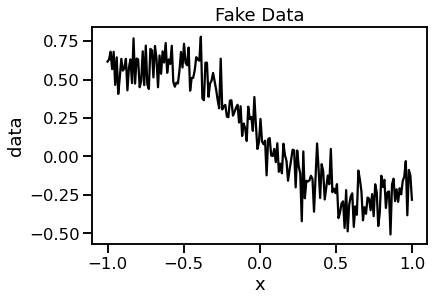

In [21]:
n = 200 # the number of data points
m = 4 # the order of our polynomial
x = np.linspace(-1, 1, n)
A = np.vstack([x**idx for idx in range(m)]).T

# In this step, I'm going to make some fake data for us to fit
true_w = np.random.normal(size=m)
data = A.dot(true_w) + np.random.normal(0, 0.1, size=x.shape[0])

fig, ax = plt.subplots()
plt.plot(x, data, c='k')
ax.set(xlabel='x', ylabel='data', title='Fake Data')

I generated this data with a matrix $\mathbf A$ and randomly generated some "true" value for $\mathbf w$. Now we'd like to solve the equation 

$\mathbf y = \mathbf A \cdot \mathbf w$

Let's try `numpy`'s solve again

In [22]:
np.linalg.solve(A, data)

LinAlgError: Last 2 dimensions of the array must be square

Oh dear. No we can't.

We can't solve this system of equations as we've written it because $\mathbf A$ is not square. All the methods above $\mathbf A$ to be square. (In our description of linear models this means we need the same number of linear equations as we have coefficients to find.)

We're going to have to try to do something else.

<div class="admonition">
<p class="admonition-title">The Take Aways</p>
    <p> In this notebook you should have seen that <ul>
    <li>1) you can build a linear model, and represent it as matrices </li>
    <li>2) it is possible to solve linear models in Python using `numpy` functions </li>
    <li>3) we can write a simple linear model for test data, but we can only solve it if the design matrix is square. </li></ul></p>
</div>